We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

In [27]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 
%matplotlib inline

In [17]:
from datetime import datetime
from pandas_datareader import data, wb
import pandas_datareader as pdr


In [18]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [19]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [20]:
for stock in tech_list:
    globals()[stock] =  pdr.DataReader(stock,'yahoo',start,end)
#set the string name as a DataFrame name


In [21]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,269.313665,263.113666,265.850359,266.501593,3.454346e+07,265.231642
std,45.695829,44.441259,44.971069,45.239425,1.730025e+07,45.778039
min,198.070007,192.580002,195.410004,193.339996,1.136200e+07,191.059784
25%,223.735001,219.279999,221.695000,222.930000,2.254000e+07,221.137848
50%,268.000000,262.730011,265.540009,266.170013,2.959680e+07,265.021912
75%,310.070007,302.095001,304.404999,308.184998,4.054380e+07,307.518204
max,372.380005,362.269989,365.000000,366.529999,1.067212e+08,366.529999


In [22]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-07-01 to 2020-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


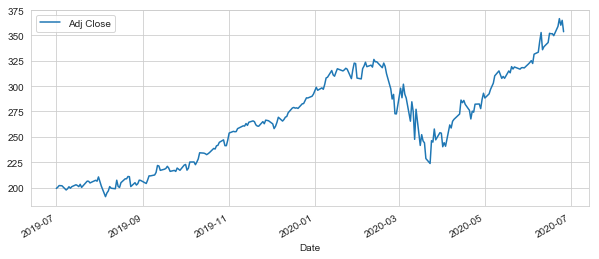

In [23]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

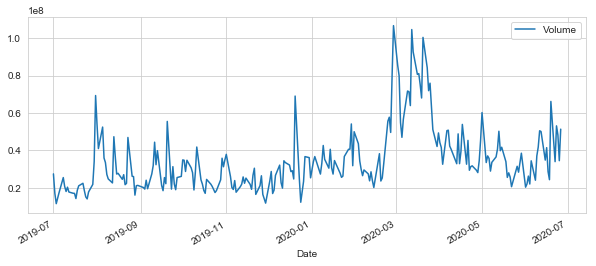

In [25]:
#volume
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [37]:
#moving averages
ma_day = [10,20,50] 

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

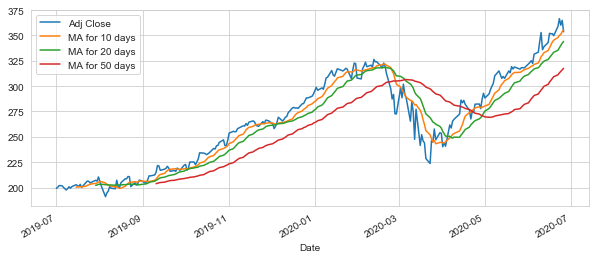

In [40]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

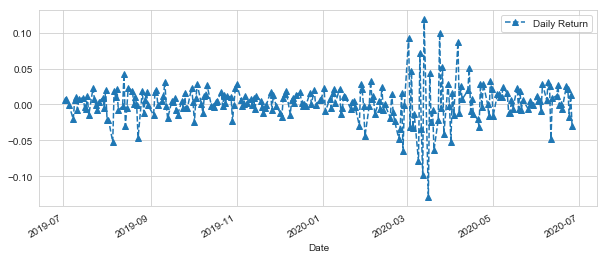

In [41]:
#daily returns
#new column 
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'] .plot(figsize=(10,4),legend=True,linestyle='--',marker='^')

C:\Users\Thor 3\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


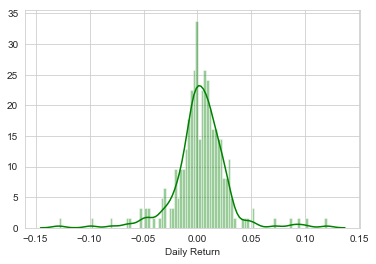

In [42]:
#with seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

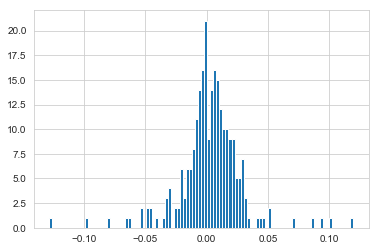

In [43]:
#pandas histogram
AAPL['Daily Return'].hist(bins=100)

In [44]:
#new data frame
closing_df = pdr.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [45]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-01,199.172989,1097.949951,134.030701,1922.189941
2019-07-02,200.339050,1111.250000,134.919754,1934.310059
2019-07-03,201.999237,1121.579956,135.789062,1939.000000
2019-07-05,201.821350,1131.589966,135.393936,1942.910034
2019-07-08,197.661011,1116.349976,135.295151,1952.319946


In [46]:
#new df
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-01,NaN,NaN,NaN,NaN
2019-07-02,0.005855,0.012114,0.006633,0.006305
2019-07-03,0.008287,0.009296,0.006443,0.002425
2019-07-05,-0.000881,0.008925,-0.002910,0.002017
2019-07-08,-0.020614,-0.013468,-0.000730,0.004843


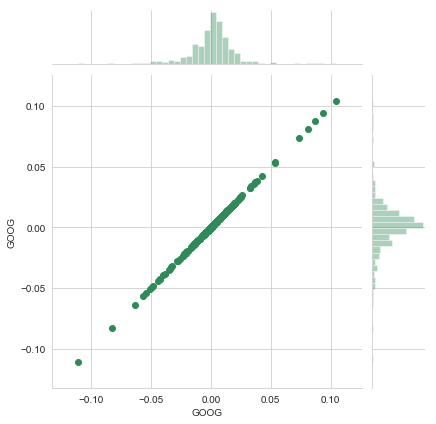

In [50]:
#compare 2 stocks
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

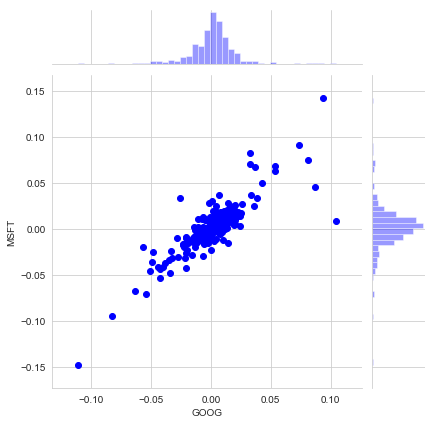

In [51]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='blue')

In [52]:
#comparison analysis
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-07-01,NaN,NaN,NaN,NaN
2019-07-02,0.005855,0.012114,0.006633,0.006305
2019-07-03,0.008287,0.009296,0.006443,0.002425
2019-07-05,-0.000881,0.008925,-0.002910,0.002017
2019-07-08,-0.020614,-0.013468,-0.000730,0.004843


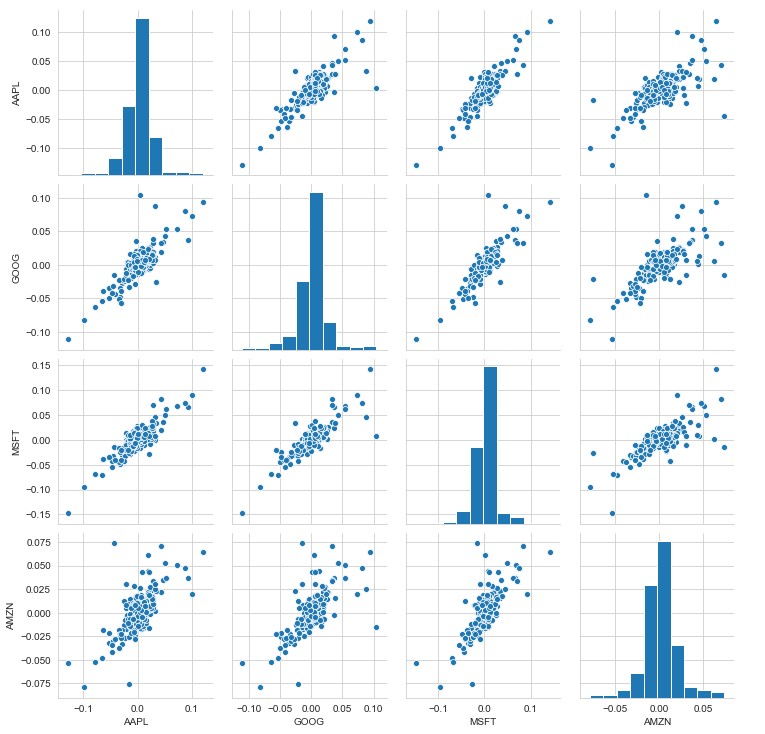

In [53]:
sns.pairplot(tech_rets.dropna())

C:\Users\Thor 3\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


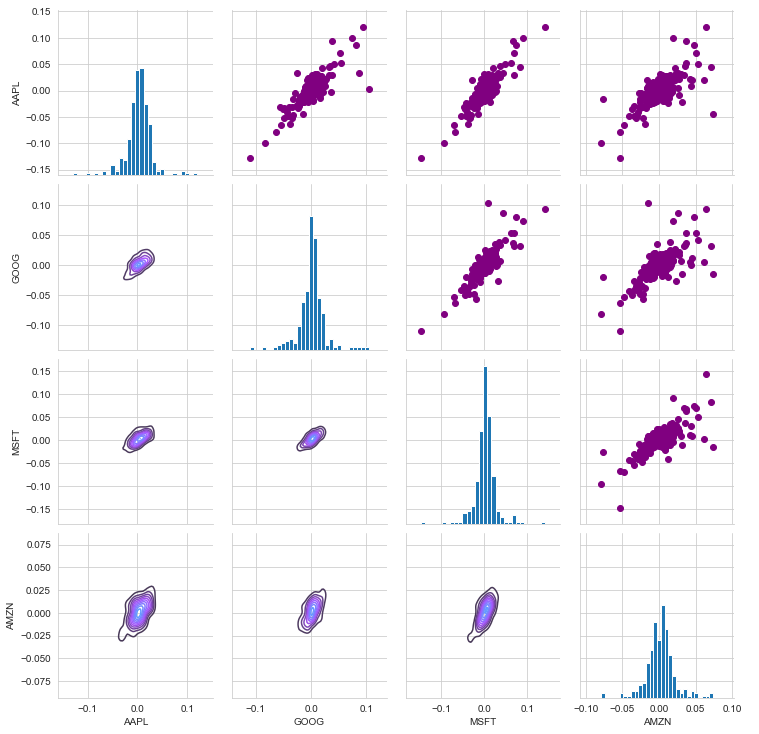

In [54]:
#create a figure
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

C:\Users\Thor 3\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


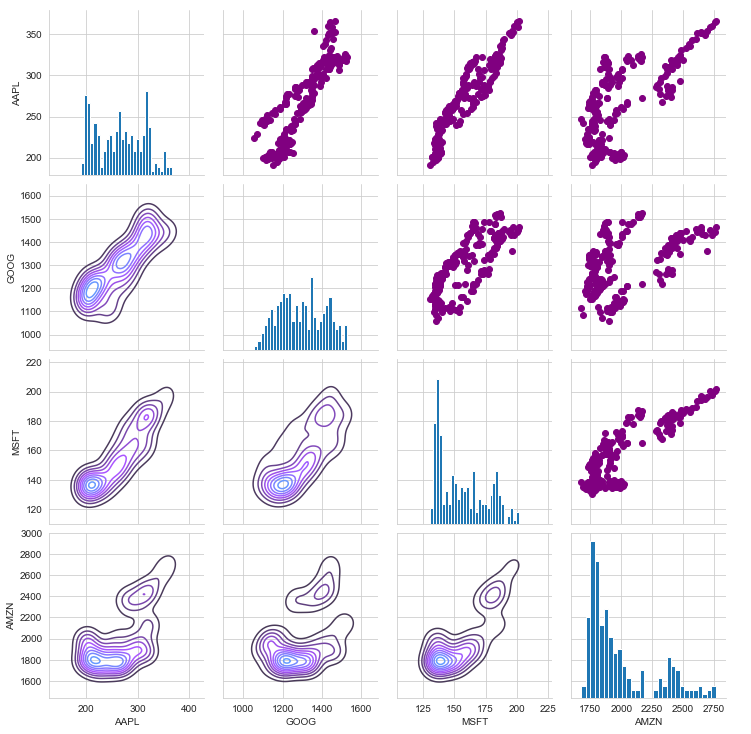

In [55]:
#create a figure for closing prices
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [61]:
#correletion for daily returns - no corrplot in seaborn as doing this exercise
sns.corrplot(tech_rets.dropna(),annot=True)

AttributeError: module 'seaborn' has no attribute 'corrplot'

In [62]:
#64 risk analisys
rets =  tech_rets.dropna()

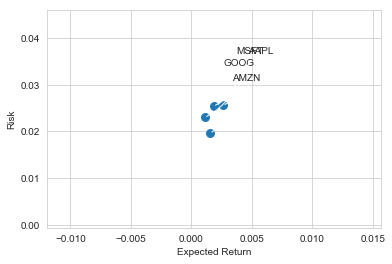

In [63]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))